# Bounding Box Creation 

In [612]:
from PIL import Image
import numpy
import matplotlib.pyplot as plt
import math
import os,cv2
import operator

### Load Image ###

In [613]:
def loadImage(path,name):
    image = Image.open('{path}/{name}'.format(path=path,name=name)).convert('L')
    testData = 255 - numpy.asarray(image)   
    return testData

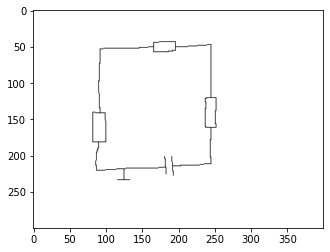

In [614]:
image = loadImage("./testImages","0.png")
plt.imshow(image, cmap=plt.cm.binary,interpolation="bilinear")

## Drawing Functions ##

In [615]:
def drawCicle(image,center, radius,width=1,color=(0,0,0)):
    for y in range(0,len(image)):
        for x in range(0,len(image[y])):
            dist = math.sqrt((center.x-x)**2 + (center.y-y)**2)
            if dist <= radius+width and dist >= radius-width :
                image[y][x] = color
    return image
                
def drawRect(image,center,widht,height,strokeWidth=1,color=(0,0,0)):
    for y in range(0,len(image)):
        for x in range(0,len(image[y])):
            distX = abs(center.x-x)
            distY = abs(center.y-y)
            if distX == int(widht/2) and y >= center.y-(height/2) and y <= center.y+(height/2):
                image[y][x] = color
            if distY == int(height/2) and x >= center.x-(widht/2) and x <= center.x+(widht/2):
                image[y][x] = color
    return image

def cropRect(img,center, dist):
    newImg = numpy.empty_like(img)
    newImg[:] = img
    if dist % 2 != 0:
        dist +=1
    i = []
    for y in range(0,len(image)):
        for x in range(0,len(image[y])):
           if x > center.x-dist and x <= center.x+dist and y > center.y-dist and y <= center.y+dist:
               i.append(newImg[y][x])
    return numpy.reshape(i,[dist*2,dist*2,3])

## Define Features ##

### Feature Types:
- End Point
- Intersection
- Center

In [616]:
class Point():
    def __init__(self,x,y) -> None:
        self.x = x
        self.y = y
    def __str__(self) -> None:
        return '({x},{y})'.format(x=self.x,y=self.y)
    def __repr__(self):
        return str(self)
class Feature(Point):
    pass
class EndPoint(Feature):
    pass
class Intersection(Feature):
    pass
class Center(Feature):
    pass

## Feature functions ###

In [617]:
def getDistance(point1,point2):
    return math.sqrt((point1.x-point2.x)**2 + (point1.y-point2.y)**2)

def getClosestPoint(point,pointList):
    pointList = list(filter(lambda p: p != point,pointList))
    distances = list(map(lambda p: getDistance(point,p),pointList))
    indexOfMinimum = numpy.argmin(distances)
    return pointList[indexOfMinimum]

def getNClosestPoint(point,pointList,n):
    pointList = list(
                    filter(lambda p: p != point,pointList)
                )
    distances = numpy.array(list(map(lambda p: getDistance(point,p),pointList)))
    indexiesOfMinima = (distances).argsort()[:n]
    elements = list(map(lambda index: pointList[index],indexiesOfMinima))
    return elements

### Set Features ###

(In the Future this is replaced by featureRecognicion Algorithm)
Features also need to be cleand

In [618]:
endPointList = [EndPoint(181,201),
                EndPoint(191,201),
                EndPoint(183,225),
                EndPoint(193,227),
                EndPoint(133,233),
                EndPoint(116,233)]

intersectionList = [Intersection(245,161),
                    Intersection(245,120),
                    Intersection(196,50),
                    Intersection(166,50),
                    Intersection(92,141),
                    Intersection(90,181),
                    Intersection(182,215),
                    Intersection(192,214),
                    Intersection(125,218),
                    Intersection(125,233)]

## Print Feature Points

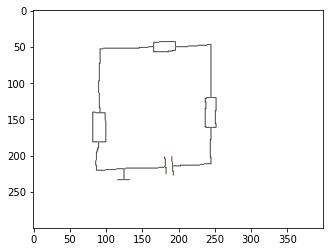

In [619]:
#make a rgb copy form an 1 bit image
outImage = []
for y in range(0,len(image)):
    row = []
    for x in range(0,len(image[y])):
        if image[y][x] >= 1:
            row.append((0,0,0))
        else:
            row.append((255,255,255))
    outImage.append(row)

for endPoint in endPointList:
    outImage[endPoint.y][endPoint.x] = (255,0,0)

for intersection in intersectionList:
    outImage[intersection.y][intersection.x] = (0,255,0)
    
plt.imshow(outImage, interpolation='bilinear')

## Create Bounding Boxes ##

41
41
30
30
40
40
10
10
15
15


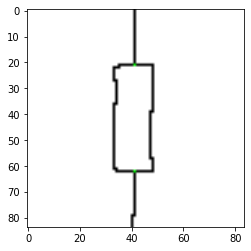

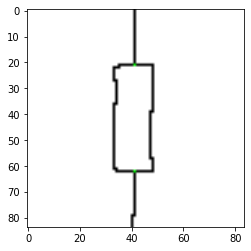

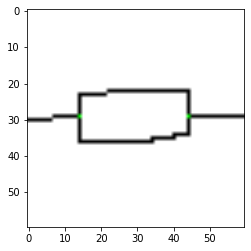

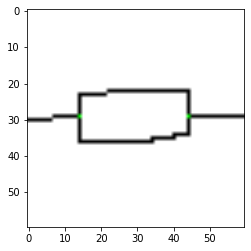

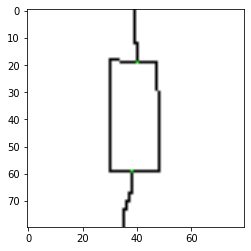

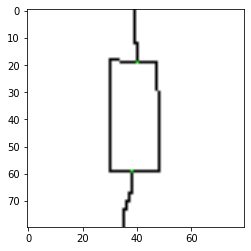

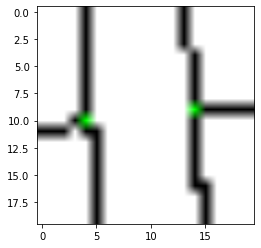

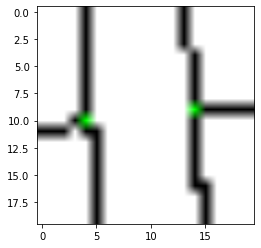

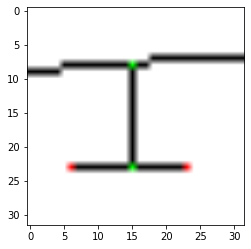

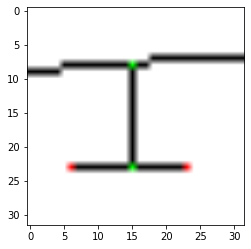

<Figure size 432x288 with 0 Axes>

In [620]:
#redCircles = numpy.empty_like(outImage)
#redCircles[:] = outImage
#greenCircles = numpy.empty_like(outImage)
#greenCircles[:] = outImage

for intersection in intersectionList:
    closestPoint = getClosestPoint(intersection,intersectionList)
    dist = math.floor(getDistance(closestPoint,intersection))
    center = Point((closestPoint.x-intersection.x)/2+intersection.x,(closestPoint.y-intersection.y)/2+intersection.y)
    plt.imshow(cropRect(img=outImage,center=center,dist=dist), interpolation='bilinear')
    plt.figure()
    #redCircles = drawRect(image=redCircles,center=center,widht=dist+1,height=dist+1,color=(255,0,0),strokeWidth=2)


#for intersection in intersectionList:
#    closestPoints = getNClosestPoint(intersection,endPointList,n=2)
#    dist = max(list(map(lambda x: getDistance(x,intersection),closestPoints)))
#    greenCircles = drawRect(image=greenCircles,center=intersection,widht=dist+1,height=dist+1,color=(0,255,0),strokeWidth=2)    
#